In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import math
from typing import Optional, List
from sortedcontainers import SortedDict
from Plasma import Plasma_Evolver
import itertools

import matplotlib.cm as cm

In [5]:
dts = np.logspace(-1, -5, 5, base=2)
#dts.append(0.01)
N = 128
tmax = 5
print(dts)

euler_plasmas = []
rk4_plasmas = []

for dt in dts:
    euler_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0, insertion=False, rk = False)
    rk4_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0, insertion=False, rk = True)
    euler_model.evolve_plasma(tmax)
    rk4_model.evolve_plasma(tmax)
    euler_plasmas.append(euler_model)
    rk4_plasmas.append(rk4_model)


[0.5     0.25    0.125   0.0625  0.03125]


In [6]:
reg_euler_plasmas = []
reg_rk4_plasmas = []

for dt in dts:
    euler_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.1, insertion=False, rk = False)
    rk4_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.1, insertion=False, rk = True)
    euler_model.evolve_plasma(tmax)
    rk4_model.evolve_plasma(tmax)
    reg_euler_plasmas.append(euler_model)
    reg_rk4_plasmas.append(rk4_model)

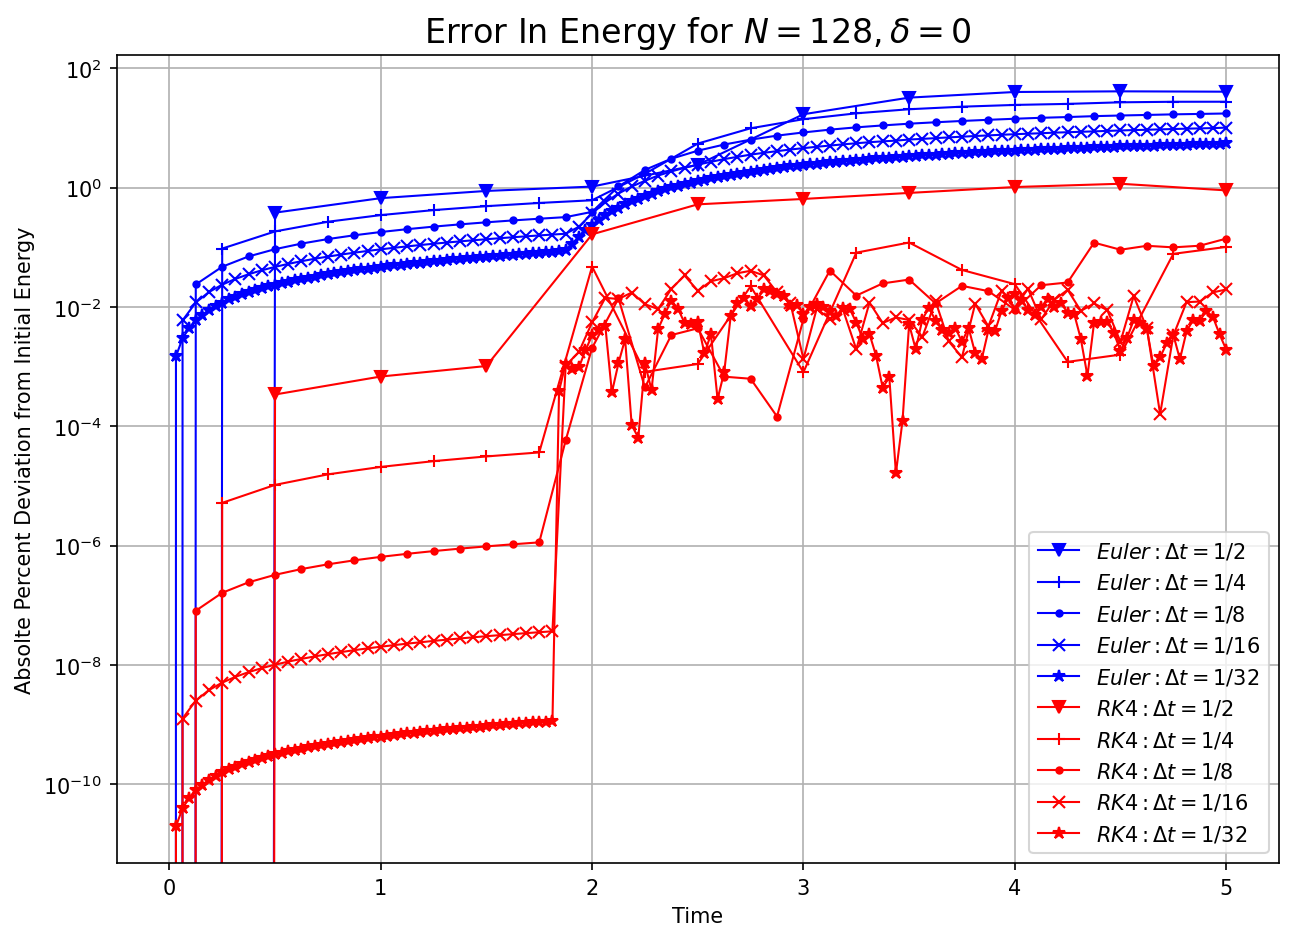

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
marker = itertools.cycle(('v', '+', '.', 'x', '*')) 
axs.yaxis.set_major_formatter(ticker.PercentFormatter())

for plasma in euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs((total_energy - total_energy[0]) / total_energy[0] * 100)
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, marker= next(marker), color='blue', 
             linewidth = 1, label = r'$Euler: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
for plasma in rk4_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = (np.abs(total_energy - total_energy[0])/ total_energy[0] * 100)
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='red', 
             linewidth = 1, label = r'$RK4: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
axs.set_title("Error In Energy for $N = {}, \delta = 0$".format(N), fontsize=16)
axs.set_xlabel("Time")
axs.set_ylabel("Absolte Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

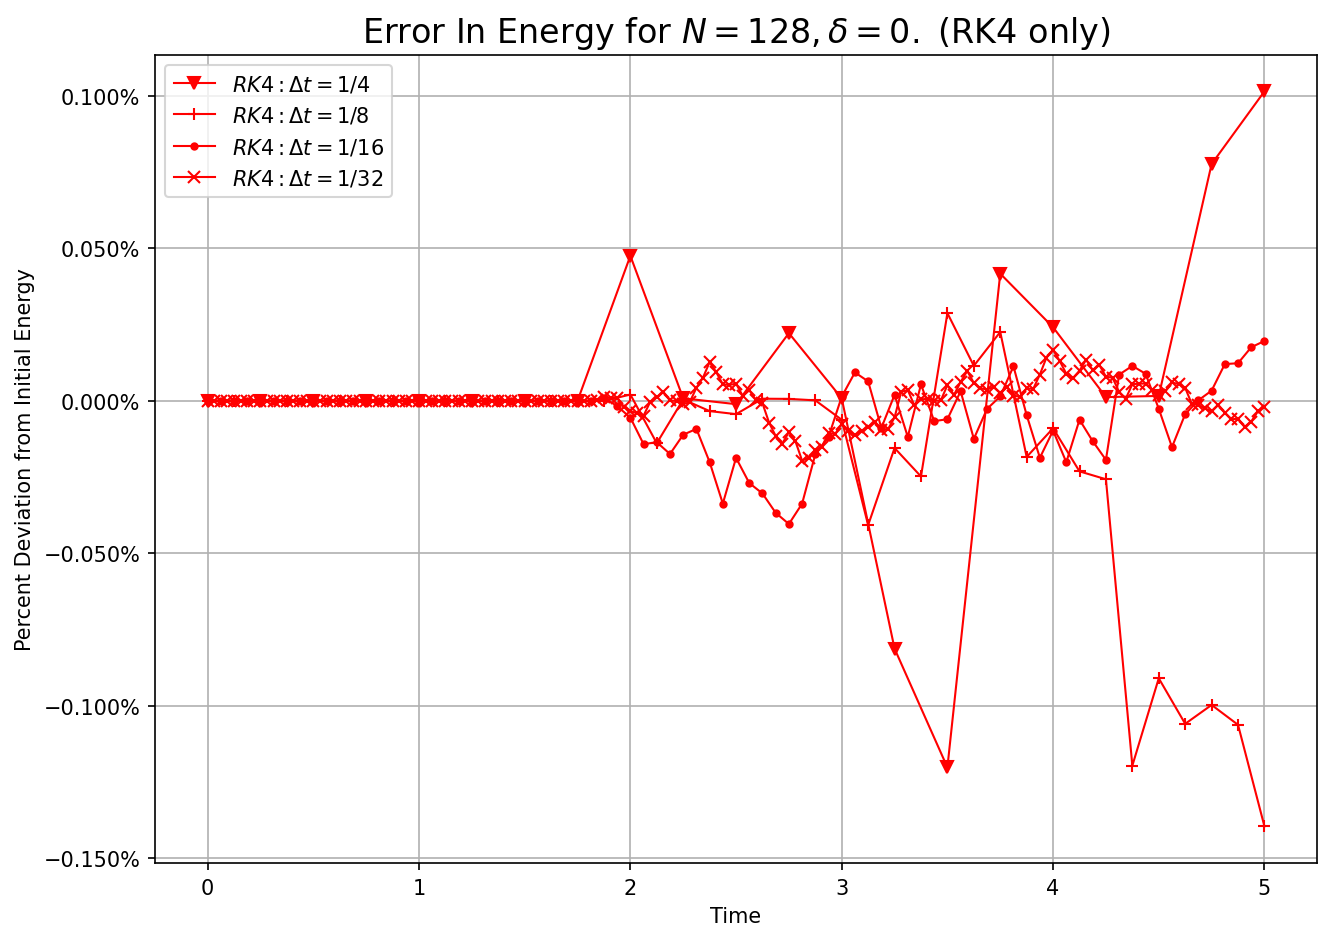

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
marker = itertools.cycle(('v', '+', '.', 'x', '*')) 

axs.yaxis.set_major_formatter(ticker.PercentFormatter())
    
for plasma in rk4_plasmas:
    if plasma.dt == 1/2: continue
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = (total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, marker= next(marker), color='red', 
             linewidth = 1, label = r'$RK4: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
axs.set_title("Error In Energy for $N = {}, \delta = 0. $ (RK4 only)".format(N), fontsize=16)
axs.set_xlabel("Time")
axs.set_ylabel("Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

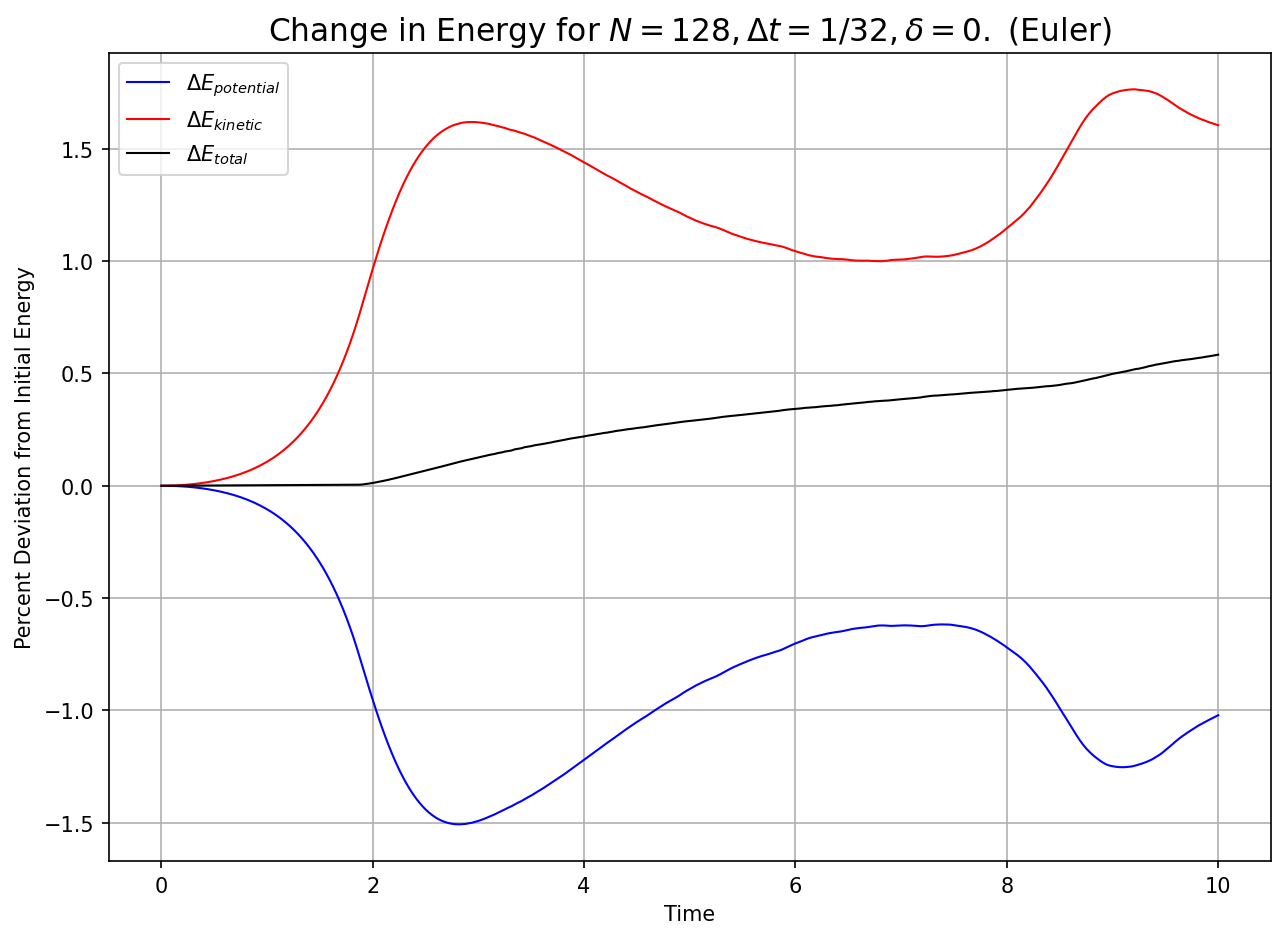

In [49]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)


ref_plasma_euler = Plasma_Evolver(128, 1/32, epsilon_in=0.05, delta_in=0, insertion=False, rk = False)
ref_plasma_euler.evolve_plasma(10)
t = np.arange(len(ref_plasma_euler.Ep_hist))* plasma.dt

axs.plot(t, np.array(ref_plasma_euler.Ep_hist) - ref_plasma_euler.Ep_hist[0], 'b', label=r'$\Delta E_{potential}$')
axs.plot(t, np.array(ref_plasma_euler.Ek_hist) - ref_plasma_euler.Ek_hist[0], 'r', label=r'$\Delta E_{kinetic}$' )
axs.plot(t, np.array(ref_plasma_euler.Ep_hist) + np.array(ref_plasma_euler.Ek_hist) - ref_plasma_euler.Ep_hist[0]- ref_plasma_euler.Ek_hist[0],
         'k', label=r'$\Delta E_{total}$')
axs.set_title("Change in Energy for $N = {}, \Delta t = 1/32, \delta = 0. $ (Euler)".format(ref_plasma_euler.N), fontsize=15)
axs.set_xlabel("Time")
axs.set_ylabel("Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

In [ ]:
ref_plasma_euler = Plasma_Evolver(128, 1/32, epsilon_in=0.05, delta_in=0, insertion=False, rk = False)
ref_plasma_euler.evolve_plasma(10)
ref_plasma = Plasma_Evolver(128, 1/32, epsilon_in=0.05, delta_in=0, insertion=False, rk = True)
ref_plasma.evolve_plasma(10)
t = np.arange(len(ref_plasma.Ep_hist))* plasma.dt

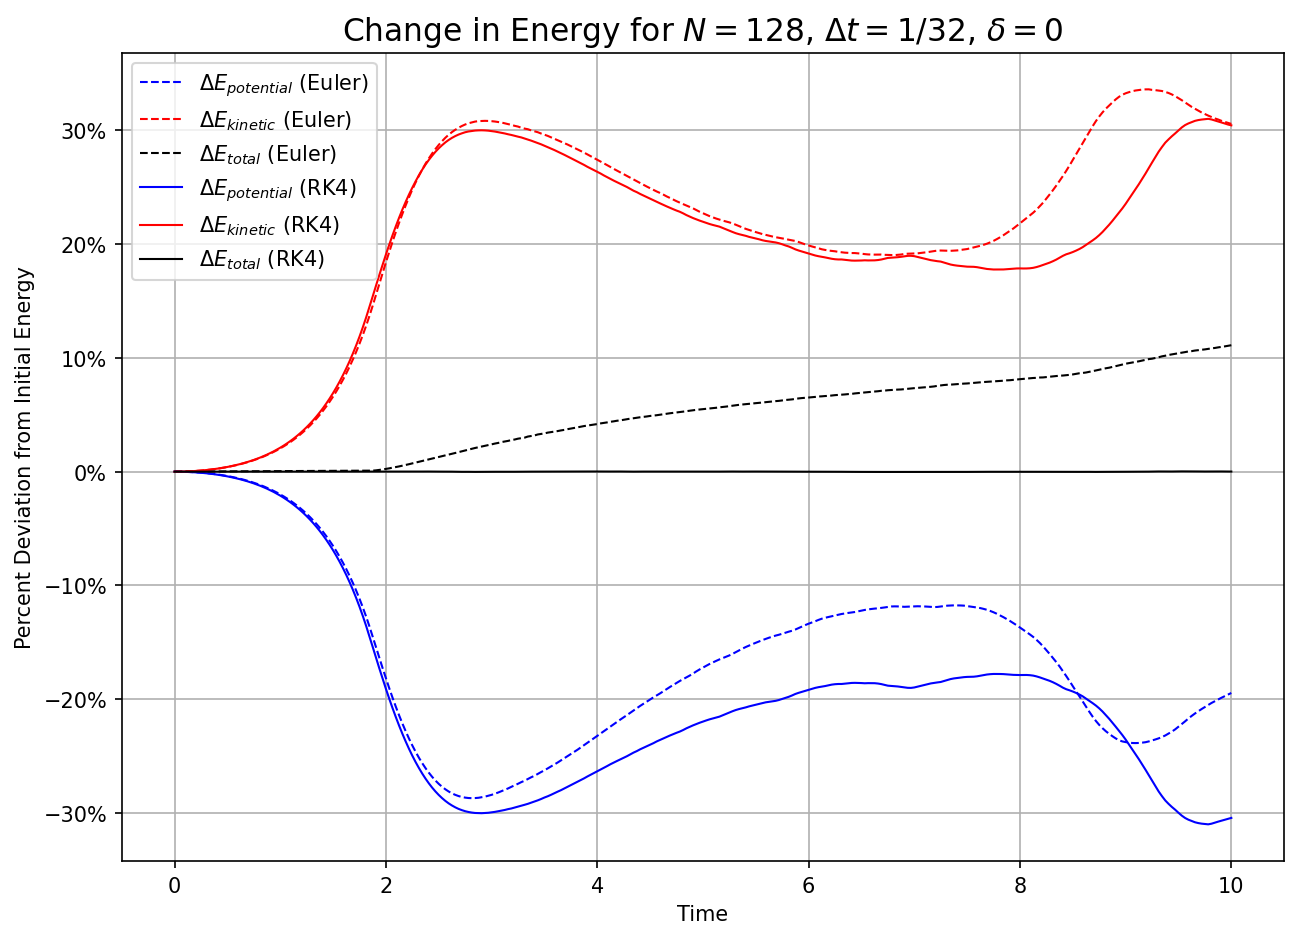

In [60]:
plt.rcParams['lines.linewidth'] = 1

fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
axs.yaxis.set_major_formatter(ticker.PercentFormatter())

rk4_total_energy = np.array(ref_plasma.Ep_hist) + np.array(ref_plasma.Ek_hist)
rk4_t = (rk4_total_energy - rk4_total_energy[0]) / rk4_total_energy[0] * 100
rk4_k = (np.array(ref_plasma.Ek_hist) - ref_plasma.Ek_hist[0]) / rk4_total_energy[0] * 100
rk4_p = (np.array(ref_plasma.Ep_hist) - ref_plasma.Ep_hist[0]) / rk4_total_energy[0] * 100

euler_total_energy = np.array(ref_plasma_euler.Ep_hist) + np.array(ref_plasma_euler.Ek_hist)
euler_t = (euler_total_energy - euler_total_energy[0]) / euler_total_energy[0] * 100
euler_k = (np.array(ref_plasma_euler.Ek_hist) - ref_plasma_euler.Ek_hist[0]) / euler_total_energy[0] * 100
euler_p = (np.array(ref_plasma_euler.Ep_hist) - ref_plasma_euler.Ep_hist[0]) / euler_total_energy[0] * 100

axs.plot(t, euler_p, 'b', linestyle='--', label=r'$\Delta E_{potential}$ (Euler)')
axs.plot(t, euler_k, 'r', linestyle='--',label=r'$\Delta E_{kinetic}$ (Euler)' )
axs.plot(t, euler_t,
         'k', linestyle='--', label=r'$\Delta E_{total}$ (Euler)')

axs.plot(t, rk4_p, 'b', label=r'$\Delta E_{potential}$ (RK4)')
axs.plot(t, rk4_k, 'r', label=r'$\Delta E_{kinetic}$ (RK4)' )
axs.plot(t, rk4_t,
         'k', label=r'$\Delta E_{total}$ (RK4)')

axs.set_title(r"Change in Energy for $N = {}$, $\Delta t = 1/32$, $\delta = 0$".format(ref_plasma.N), fontsize=15)
axs.set_xlabel("Time")
axs.set_ylabel("Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

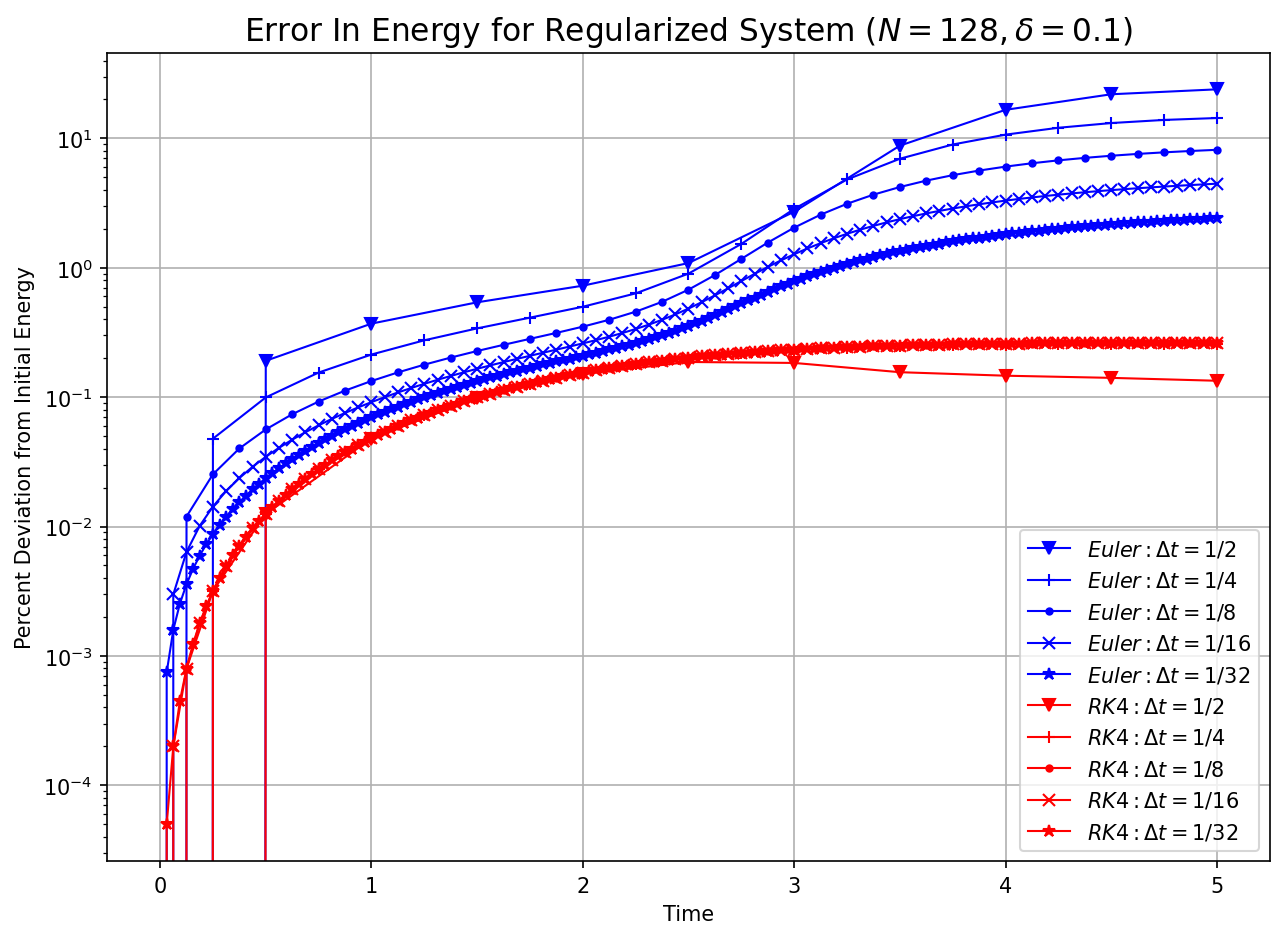

In [75]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
marker = itertools.cycle(('v', '+', '.', 'x', '*')) 
axs.yaxis.set_major_formatter(ticker.PercentFormatter())

for plasma in reg_euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, marker= next(marker), color='blue', 
             linewidth = 1, label = r'$Euler: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
for plasma in reg_rk4_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='red', 
             linewidth = 1, label = r'$RK4: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
axs.set_title("Error In Energy for Regularized System ($N = {}, \delta = 0.1$)".format(N), fontsize= 15)
axs.set_xlabel("Time")
axs.set_ylabel("Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

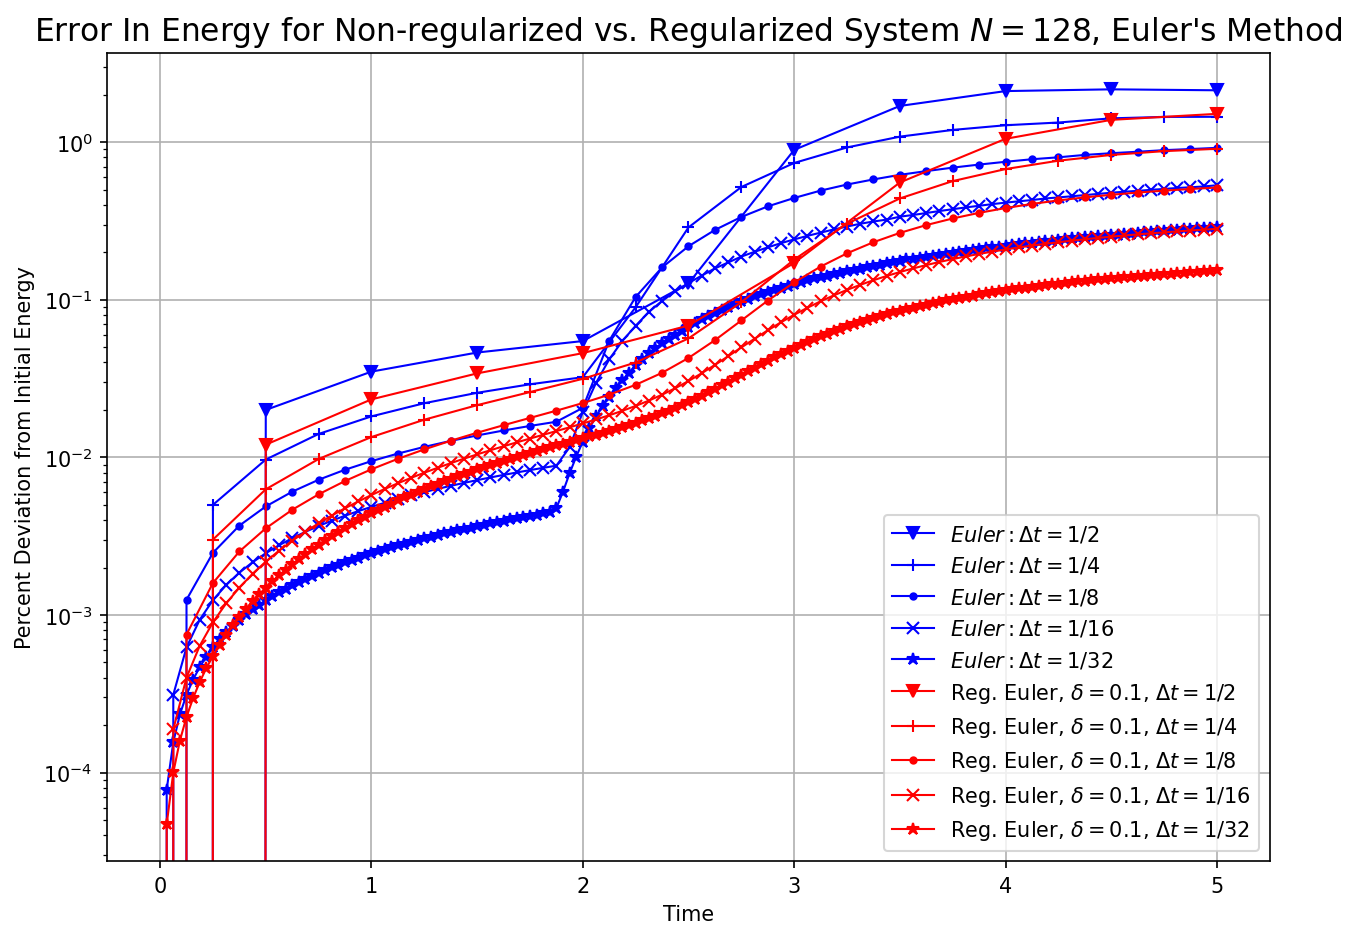

In [74]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
marker = itertools.cycle(('v', '+', '.', 'x', '*')) 

axs.yaxis.set_major_formatter(ticker.PercentFormatter())

for plasma in euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = total_energy - total_energy[0]
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='blue', 
             linewidth = 1, label = r'$Euler: \Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
for plasma in reg_euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = total_energy - total_energy[0]
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='red', 
             linewidth = 1, label = r'Reg. Euler, $\delta = 0.1$, $\Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
axs.set_title("Error In Energy for Non-regularized vs. Regularized System $N = {}$, Euler's Method".format(N), fontsize= 15)
axs.set_xlabel("Time")
axs.set_ylabel("Percent Deviation from Initial Energy")
axs.legend()
axs.grid()

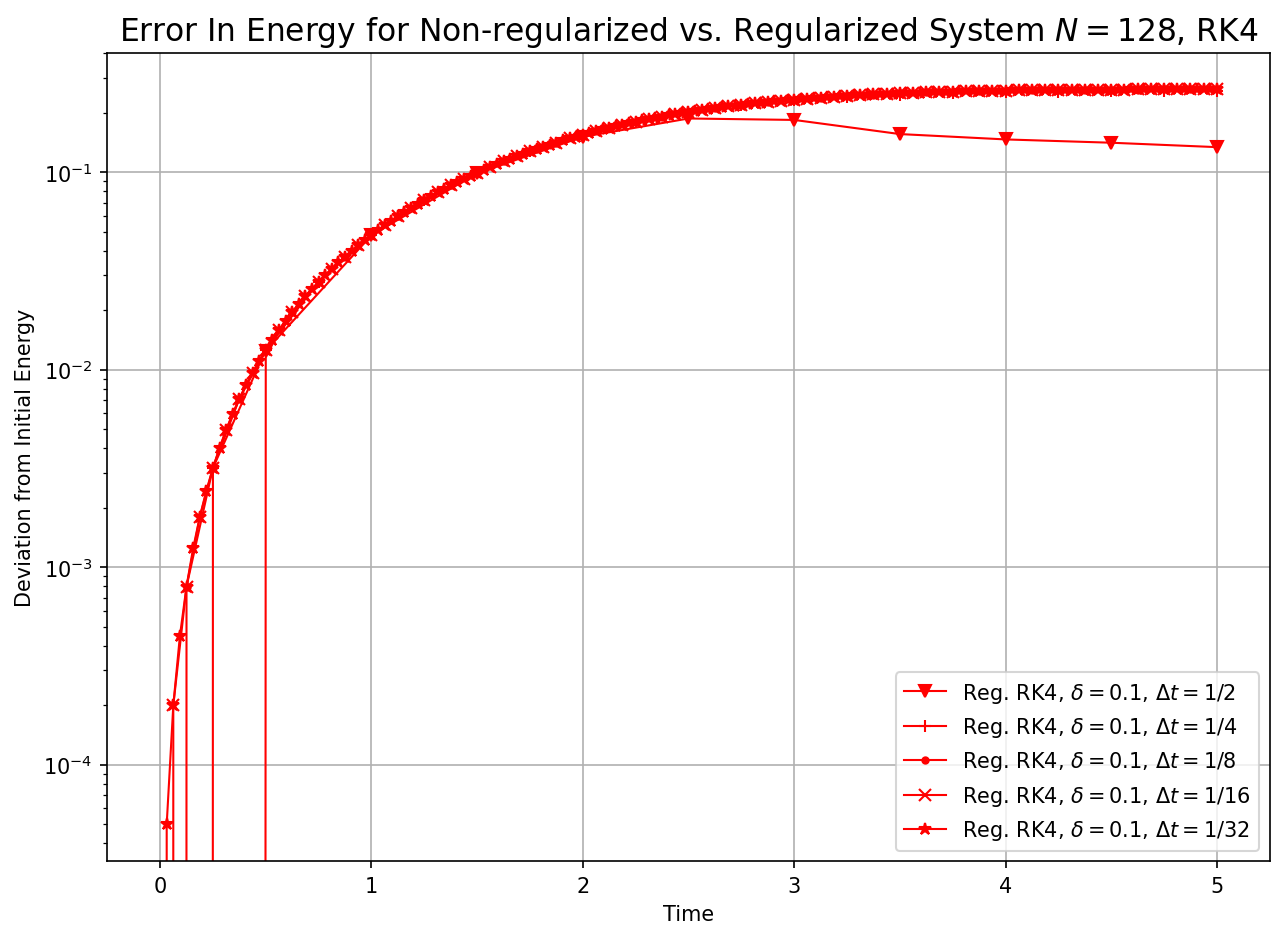

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
marker = itertools.cycle(('v', '+', '.', 'x', '*')) 

axs.yaxis.set_major_formatter(ticker.PercentFormatter())


""" for plasma in rk4_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='blue', 
             linewidth = 1, label = r'$RK4: \Delta t = 1/{}$'.format(int(1/plasma.dt))) """
    
for plasma in reg_rk4_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.semilogy(t, energy_diff, marker= next(marker), color='red', 
             linewidth = 1, label = r'Reg. RK4, $\delta = 0.1$, $\Delta t = 1/{}$'.format(int(1/plasma.dt)))
    
axs.set_title("Error In Energy for Non-regularized vs. Regularized System $N = {}$, RK4".format(N), fontsize= 15)
axs.set_xlabel("Time")
axs.set_ylabel("Deviation from Initial Energy")
axs.legend()
axs.grid()

In [16]:
print(dts)

for i, plasma in enumerate(reg_rk4_plasmas):
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    print(energy_diff[-1])
    #print('\n')
    #print((energy_diff[-2] - energy_diff[-1]) / (dts[i] ** 4 ))

[0.5     0.25    0.125   0.0625  0.03125]
0.13391531182561023
0.2571000505546322
0.2624455896123685
0.2626162254504069
0.2626219369361807


In [22]:
dts = np.logspace(-5, -10, 6, base=2)

reg_euler_plasmas = []
reg_rk4_plasmas = []

for dt in dts:
    euler_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.1, insertion=False, rk = False)
    rk4_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.1, insertion=False, rk = True)
    euler_model.evolve_plasma(tmax)
    rk4_model.evolve_plasma(tmax)
    reg_euler_plasmas.append(euler_model)
    reg_rk4_plasmas.append(rk4_model)




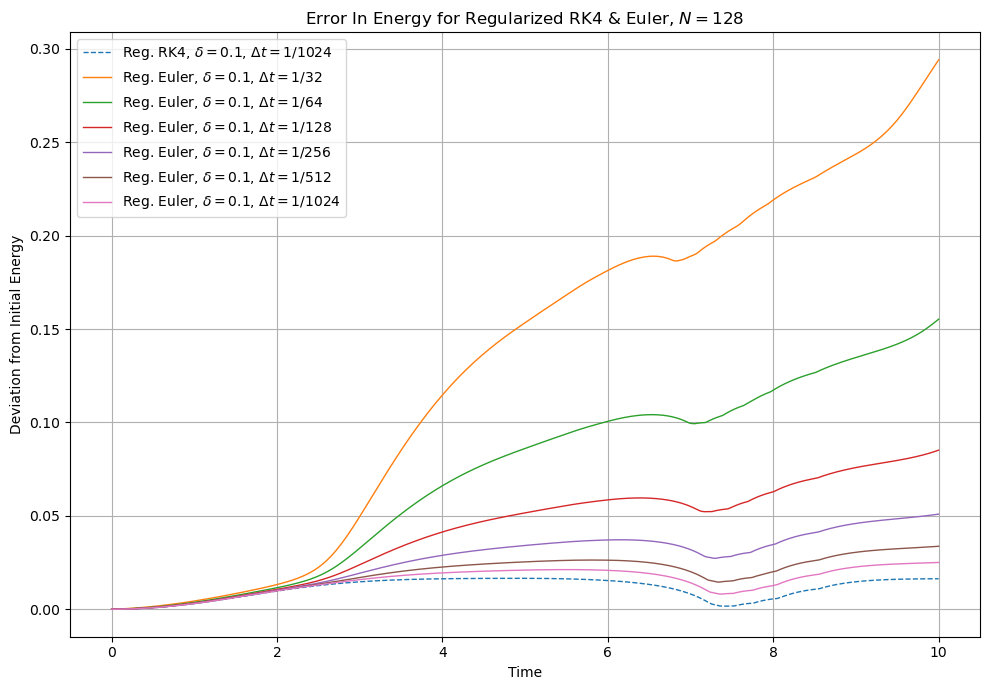

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
marker = itertools.cycle(('v', '+', '.', 'x', '*'))



rk4_total_energy = np.array(reg_rk4_plasmas[-1].Ep_hist) + np.array(reg_rk4_plasmas[-1].Ek_hist)
energy_diff = rk4_total_energy - rk4_total_energy[0]
t = np.arange(len(reg_rk4_plasmas[-1].Ep_hist))* reg_rk4_plasmas[-1].dt
axs.plot(t, energy_diff, linestyle="--",
            linewidth = 1, label = r'Reg. RK4, $\delta = 0.1$, $\Delta t = 1/{}$'.format(int(1/reg_rk4_plasmas[-1].dt)))

for plasma in reg_euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = total_energy - total_energy[0]
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, 
             linewidth = 1, label = r'Reg. Euler, $\delta = 0.1$, $\Delta t = 1/{}$'.format(int(1/plasma.dt)))


axs.set_title("Error In Energy for Regularized RK4 & Euler, $N = {}$".format(N))
axs.set_xlabel("Time")
axs.set_ylabel("Deviation from Initial Energy")
axs.legend()
axs.grid()
fig.tight_layout()

In [81]:
deltas = 0.1 * np.logspace(0, -3, 4, base=2)
dt = 1/32
tmax = 5

diff_rk4_plasmas = []

for d in deltas:
    rk4_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=d, insertion=False, rk = True)
    rk4_model.evolve_plasma(tmax)
    diff_rk4_plasmas.append(rk4_model)

C:\Users\yayin\AppData\Local\Temp\ipykernel_4292\902408323.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


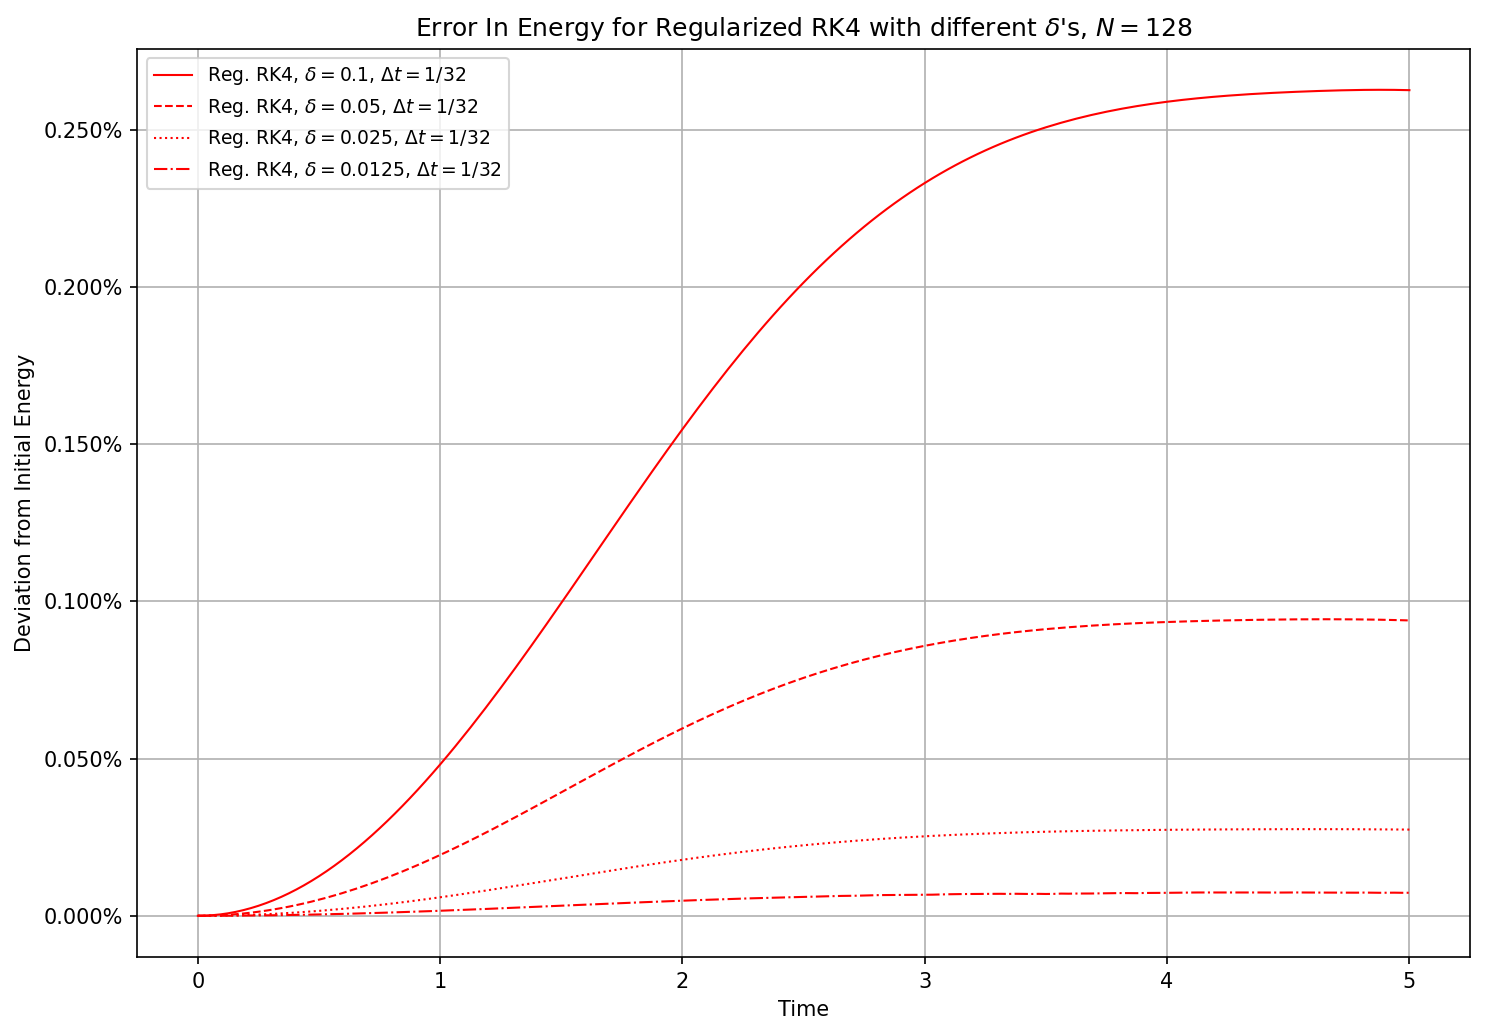

In [86]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
linestyles = itertools.cycle(('-', '--', ':', '-.'))
cmap = cm.get_cmap('Blues')
norm = plt.Normalize(0, 0.4)

axs.yaxis.set_major_formatter(ticker.PercentFormatter())


for i, plasma in enumerate(diff_rk4_plasmas):
    pos = i / len(diff_rk4_plasmas)
    color = cmap(norm(pos))
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs(total_energy - total_energy[0]) / total_energy[0] * 100
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, color='red', linestyle=next(linestyles), 
             linewidth = 1, label = r'Reg. RK4, $\delta = {}$, $\Delta t = 1/{}$'.format(plasma.delta, int(1/plasma.dt)))
    
axs.set_title("Error In Energy for Regularized RK4 with different $\delta$'s, $N = {}$".format(N))
axs.set_xlabel("Time")
axs.set_ylabel("Deviation from Initial Energy")
axs.legend(fontsize=9)
axs.grid()
fig.tight_layout()

In [32]:
Ns = np.logspace(5, 8, 4, base=2)
dt = 1/64
delta = 0.1
tmax = 10

diff_rk4_plasmas = []

for n in Ns:
    rk4_model = Plasma_Evolver(int(n), dt, epsilon_in=0.05, delta_in=delta, insertion=False, rk = True)
    rk4_model.evolve_plasma(tmax)
    diff_rk4_plasmas.append(rk4_model)

C:\Users\yayin\AppData\Local\Temp\ipykernel_16056\4110749958.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


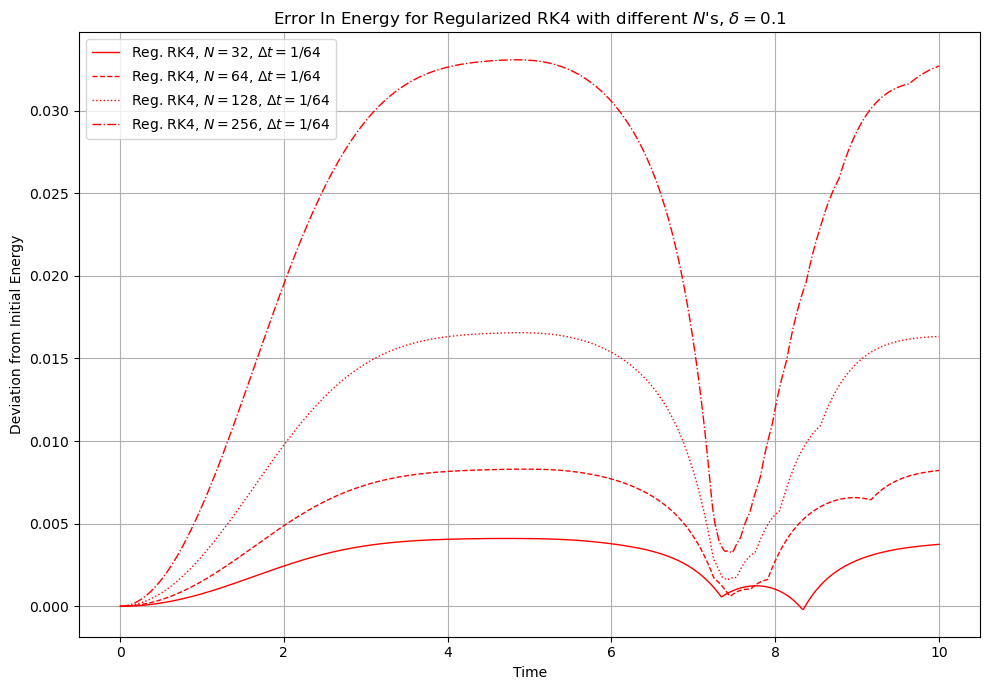

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
linestyles = itertools.cycle(('-', '--', ':', '-.'))
cmap = cm.get_cmap('Blues')
norm = plt.Normalize(0, 0.4)

for i, plasma in enumerate(diff_rk4_plasmas):
    pos = i / len(diff_rk4_plasmas)
    color = cmap(norm(pos))
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = total_energy - total_energy[0]
    t = np.arange(len(plasma.Ep_hist))* plasma.dt
    axs.plot(t, energy_diff, color='red', linestyle=next(linestyles), 
             linewidth = 1, label = r'Reg. RK4, $N = {}$, $\Delta t = 1/{}$'.format(plasma.N, int(1/plasma.dt)))
    
axs.set_title("Error In Energy for Regularized RK4 with different $N$'s, $\delta = {}$".format(delta))
axs.set_xlabel("Time")
axs.set_ylabel("Deviation from Initial Energy")
axs.legend()
axs.grid()
fig.tight_layout()

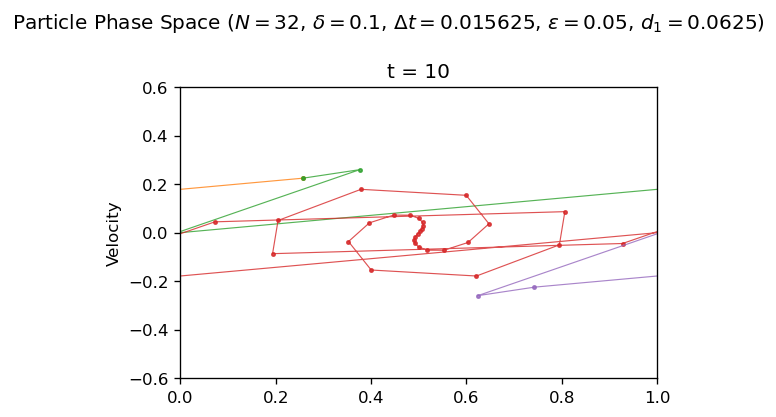

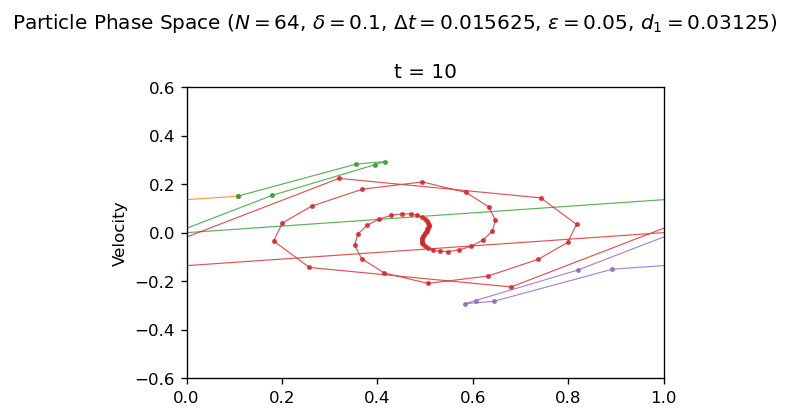

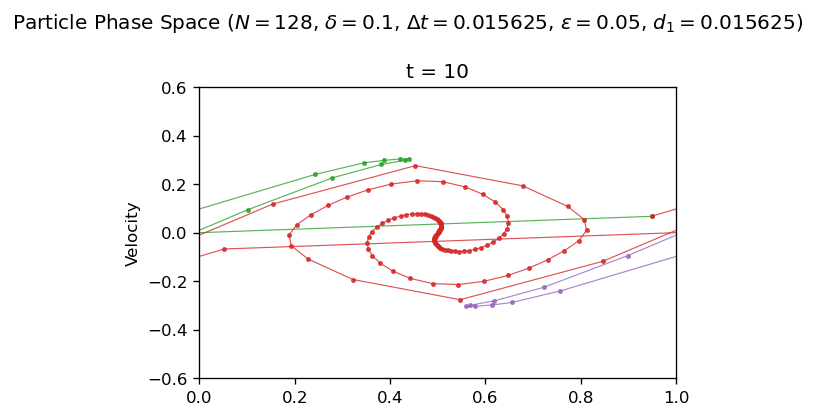

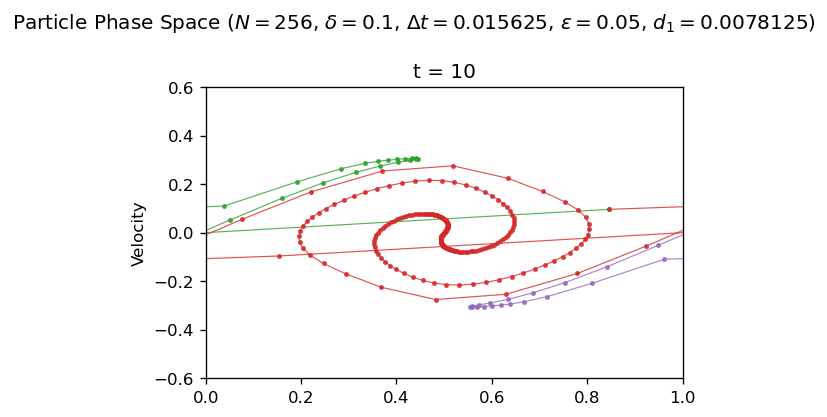

In [34]:
for plasma in diff_rk4_plasmas:
    plasma.plot_particles((-1,),periods=1)